Preprocessing of the Skin Data  
Karoline Lutz  
2021
--------------
- filtering for  cells without atac barcode
- basic QC

In [1]:
import anndata as ad
import pandas as pd
import numpy as np
from scipy import sparse
import scanpy as sc
import matplotlib.pyplot as plt


In [2]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')

In [3]:
ad.__version__

'0.7.5'

In [4]:
rna = ad.read("C:\\Users\\Karol\\Desktop\\singlecell\\data\\skin\\GSM4156597_skin.late.anagen_raw_cell_annot.rna.h5ad")
rna

AnnData object with n_obs × n_vars = 42948 × 23296
    obs: 'atac_barcode', 'paper_cell_type'

In [5]:
rna.var['mt'] = rna.var_names.str.startswith('MT-')

In [6]:
count = 0
for c in rna.var['mt']:
    if c == True:
        count += 1
        
print(count)

0


In [7]:
count = 0
for code in rna.obs['atac_barcode']:
    if code == 'NA':
        count += 1
        
print(count)

count = 0
for code in rna.obs['paper_cell_type']:
    if code == 'NA':
        count += 1
        
print(count)

8174
8174


In [8]:
rna.obs

,atac_barcode,paper_cell_type
index,,
R1.01.R2.01.R3.06.P1.55,R1.01.R2.01.R3.06.P1.07,Dermal Fibroblast
R1.01.R2.01.R3.36.P1.53,R1.01.R2.01.R3.36.P1.05,Dermal Papilla
R1.01.R2.01.R3.42.P1.55,NA,NA
R1.01.R2.01.R3.43.P1.56,R1.01.R2.01.R3.43.P1.08,TAC-1
R1.01.R2.01.R3.64.P1.53,NA,NA
...,...,...
R1.96.R2.96.R3.01.P1.55,NA,NA
R1.96.R2.96.R3.05.P1.55,NA,NA
R1.96.R2.96.R3.12.P1.55,NA,NA


In [9]:
#filter out the 'NA' cells that cant be matched to a atac barcode or cell type
rna = rna[rna.obs['atac_barcode'] != 'NA']

rna = rna[rna.obs['atac_barcode'] != 'NA']
rna

c:\users\karol\desktop\singlecell\recent\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


View of AnnData object with n_obs × n_vars = 34774 × 23296
    obs: 'atac_barcode', 'paper_cell_type'
    var: 'mt'

In [10]:
count = 0
for code in rna.obs['atac_barcode']:
    if code == 'NA':
        count += 1
        
print(count)

count = 0
for code in rna.obs['paper_cell_type']:
    if code == 'NA':
        count += 1
        
print(count)

0
0


In [11]:
rna.obs

,atac_barcode,paper_cell_type
index,,
R1.01.R2.01.R3.06.P1.55,R1.01.R2.01.R3.06.P1.07,Dermal Fibroblast
R1.01.R2.01.R3.36.P1.53,R1.01.R2.01.R3.36.P1.05,Dermal Papilla
R1.01.R2.01.R3.43.P1.56,R1.01.R2.01.R3.43.P1.08,TAC-1
R1.01.R2.02.R3.21.P1.56,R1.01.R2.02.R3.21.P1.08,IRS
R1.01.R2.02.R3.38.P1.56,R1.01.R2.02.R3.38.P1.08,Basal
...,...,...
R1.96.R2.92.R3.28.P1.56,R1.96.R2.92.R3.28.P1.08,TAC-2
R1.96.R2.92.R3.83.P1.54,R1.96.R2.92.R3.83.P1.06,Basal
R1.96.R2.92.R3.85.P1.55,R1.96.R2.92.R3.85.P1.07,Basal


c:\users\karol\desktop\singlecell\recent\lib\site-packages\scanpy\preprocessing\_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


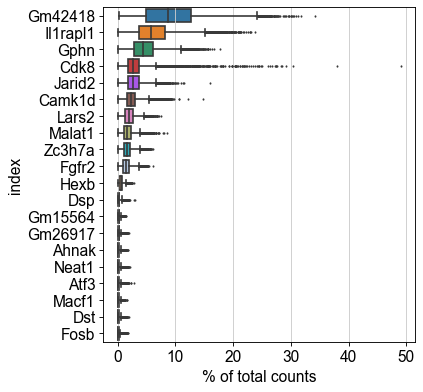

In [12]:
sc.pl.highest_expr_genes(rna, n_top = 20)

In [13]:
sc.pp.filter_cells(rna, min_genes = 200)

c:\users\karol\desktop\singlecell\recent\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [14]:
sc.pp.filter_genes(rna, min_cells = 2)

In [15]:
rna

AnnData object with n_obs × n_vars = 34774 × 21834
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes'
    var: 'mt', 'n_cells'

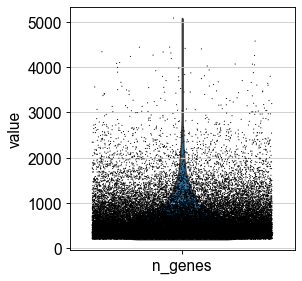

In [16]:
sc.pl.violin(rna, 'n_genes', jitter = 0.4)

In [17]:
sc.pp.calculate_qc_metrics(rna, percent_top = None, log1p = False, inplace = True)

In [18]:
rna

AnnData object with n_obs × n_vars = 34774 × 21834
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

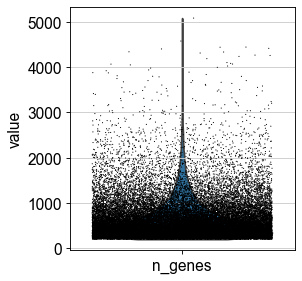

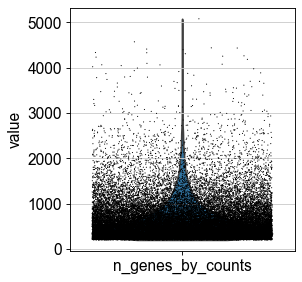

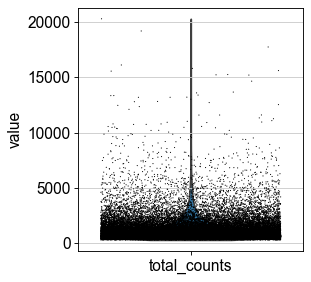

In [19]:
sc.pl.violin(rna, 'n_genes', jitter = 0.4, save='_skin_QC_ngenes.pdf')
sc.pl.violin(rna, 'n_genes_by_counts', jitter = 0.4, save='_skin_QC_ngenes.pdf') # number of genes with positive counts in a cell
sc.pl.violin(rna, 'total_counts', jitter = 0.4, save='_skin_QC_ngenes.pdf') # number of total counts  for a cell

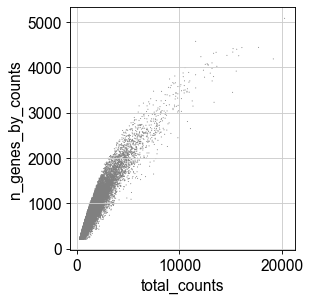

In [20]:
sc.pl.scatter(rna, x = 'total_counts', y = 'n_genes_by_counts', save='_skin_beforefilter.pdf')

In [21]:
rna

AnnData object with n_obs × n_vars = 34774 × 21834
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [22]:
# filter the anndata object
rna = rna[rna.obs.n_genes_by_counts < 4000, :]
rna

c:\users\karol\desktop\singlecell\recent\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


View of AnnData object with n_obs × n_vars = 34755 × 21834
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

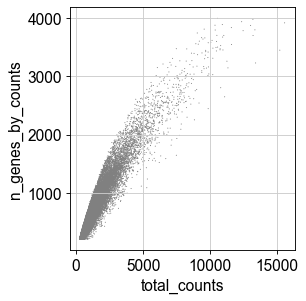

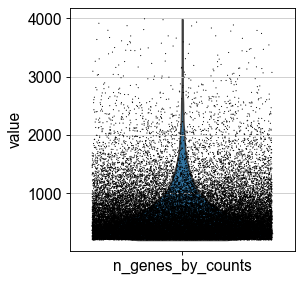

In [23]:
sc.pl.scatter(rna, x = 'total_counts', y = 'n_genes_by_counts', save='_skin_afterfiler.pdf')

sc.pl.violin(rna, 'n_genes_by_counts', jitter = 0.4, save='_skin_genesbycount_afterfiler.pdf')

In [24]:
rna.write('C:\\Users\\Karol\\Desktop\\singlecell\\data\\skin\\preprocessed\\skin_filtered_rna.h5ad')

In [25]:
# next: normalize, logtransform too
sc.pp.normalize_total(rna, target_sum = 1e4)
sc.pp.log1p(rna)

c:\users\karol\desktop\singlecell\recent\lib\site-packages\scanpy\preprocessing\_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [26]:
rna.write("C:\\Users\\Karol\\Desktop\\singlecell\\data\\skin\\preprocessed\\skin_logNorm_rna.h5ad")

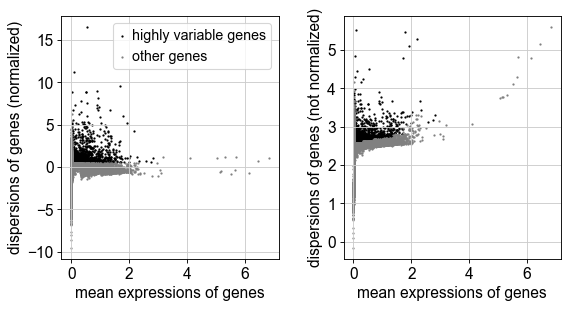

In [27]:
# look at highly variable genes
sc.pp.highly_variable_genes(rna, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
sc.pl.highly_variable_genes(rna, save = '_skin.pdf')

In [28]:
rna.raw = rna
#rna.write('/home/karo/Desktop/singleCell/GSM4156610_brain_filtered_cell_annot.rna.h5ad')

In [147]:
rna = ad.read('/home/karo/Desktop/singleCell/GSM4156610_brain_filtered_cell_annot.rna.h5ad')

In [29]:
rna = rna[:, rna.var.highly_variable]

c:\users\karol\desktop\singlecell\recent\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [30]:
sc.pp.regress_out(rna, 'total_counts')

In [31]:
sc.pp.scale(rna, max_value = 10)

In [73]:
rna.write("/dss/dsshome1/lxc02/di82cox/data/skin_data/preprocessed/skin_scaled_rna.h5ad")

c:\users\karol\desktop\singlecell\recent\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


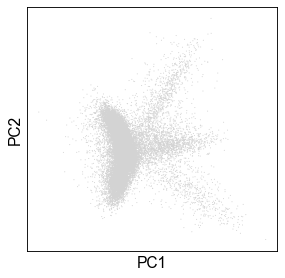

In [32]:
# PCA
sc.tl.pca(rna, svd_solver = 'arpack')

sc.pl.pca(rna, save = '_skin_scaledpca.pdf')

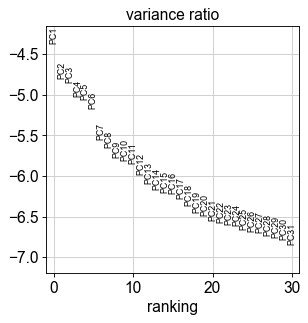

In [33]:
sc.pl.pca_variance_ratio(rna, log = True, save = '_skin.pdf')

In [34]:
sc.pp.neighbors(rna, n_neighbors = 10, n_pcs = 40)
sc.tl.umap(rna)


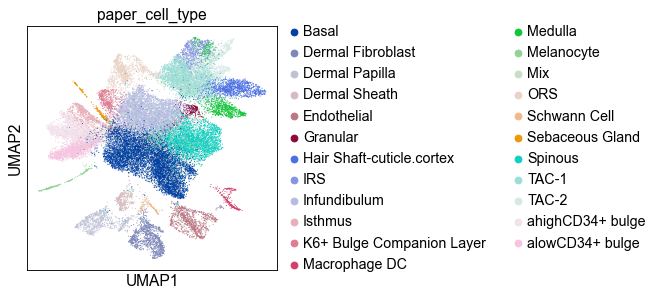

In [35]:
sc.pl.umap(rna, color = 'paper_cell_type', save = '_skin_controlumap.pdf')

In [36]:
rna

AnnData object with n_obs × n_vars = 34755 × 2304
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'paper_cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [181]:
# save the rna data
#rna.write('/home/karo/Desktop/singleCell/GSM4156610_brain_preprocessed_cell_annot.rna.h5ad')